In [2]:
import requests
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

***1. Barrer una lista de más de 150 ítems ids en el servicio público:***
***https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json***
***En este caso particular y solo a modo de ejemplo, son resultados para la búsqueda***
***“chromecast”, pero deberás elegir otros términos para el experimento que permitan*
*enriquecer el análisis en un hipotético dashboard (ejemplo Google Home, Apple TV,*
*Amazon Fire TV, o afines para poder comparar dispositivos portátiles, o bien elegir*
*otros 3 que te interesen para comparar).***


In [6]:
#Llamamos a la metrica
df_challenge = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json").json()['results'])
df_challenge ['amount'] = df_challenge.installments.map (lambda x: x['amount'])
df_challenge ['rate'] = df_challenge.installments.map (lambda x: x['rate'])

mediana_tasa_chromecast = df_challenge.rate.median()
mediana_precio_chromecast = df_challenge.price.median()
mediana_monto_chromecast = df_challenge.amount.median()

In [8]:
#Llamamos a la metrica
df_challenge = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=TV Apple&limit=50#json").json()['results'])
df_challenge ['amount'] = df_challenge.installments.map (lambda x: x['amount'])
df_challenge ['rate'] = df_challenge.installments.map (lambda x: x['rate'])

mediana_tasa_tvApple = df_challenge.rate.median()
mediana_precio_tvApple = df_challenge.price.median()
mediana_monto_tvApple = df_challenge.amount.median()

In [9]:
#Llamamos a la metrica
df_challenge = pd.DataFrame (requests.get ("https://api.mercadolibre.com/sites/MLA/search?q=Amazon Fire TV&limit=50#json").json()['results'])
df_challenge ['amount'] = df_challenge.installments.map (lambda x: x['amount'])
df_challenge ['rate'] = df_challenge.installments.map (lambda x: x['rate'])

mediana_tasa_amazonFireTv = df_challenge.rate.median()
mediana_precio_amazonFireTv = df_challenge.price.median()
mediana_monto_amazonFireTv = df_challenge.amount.median()

In [10]:
#Creo la Serie para su uso.
serie_class = pd.Series(['Chromecast','Tv Apple','Amazon Fire TV'])
serie_mediana_precio = pd.Series ([ mediana_precio_chromecast,mediana_precio_tvApple,mediana_precio_amazonFireTv ])
serie_mediana_monto = pd.Series ([ mediana_monto_chromecast,mediana_monto_tvApple,mediana_monto_amazonFireTv ])
serie_mediana_tasa = pd.Series ([ mediana_tasa_chromecast,mediana_tasa_tvApple,mediana_tasa_amazonFireTv ])

In [21]:
df_precio = pd.DataFrame ({'PRODUCTO':serie_class,'VALOR':serie_mediana_precio})
df_precio ['METRICA'] = 'Precio'
df_precio

,PRODUCTO,VALOR,METRICA
0,Chromecast,9893.5,Precio
1,Tv Apple,10649.0,Precio
2,Amazon Fire TV,11448.0,Precio


C:\Users\usuario\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


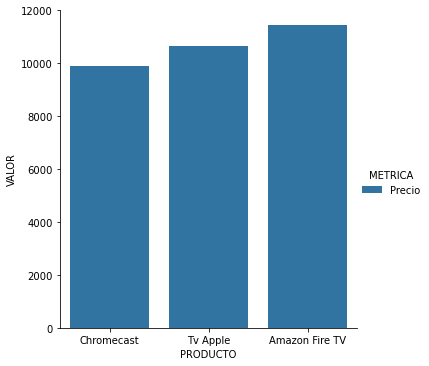

In [22]:
#Graficamos la metrica exportado
sns.factorplot(x='PRODUCTO', y='VALOR', hue='METRICA', data=df_precio, kind='bar')

In [17]:
df_monto = pd.DataFrame({'PRODUCTO':serie_class,'VALOR':serie_mediana_monto})
df_monto['METRICA'] = 'Monto'
df_monto

,PRODUCTO,VALOR,METRICA
0,Chromecast,1500.260,Monto
1,Tv Apple,1717.195,Monto
2,Amazon Fire TV,1701.560,Monto


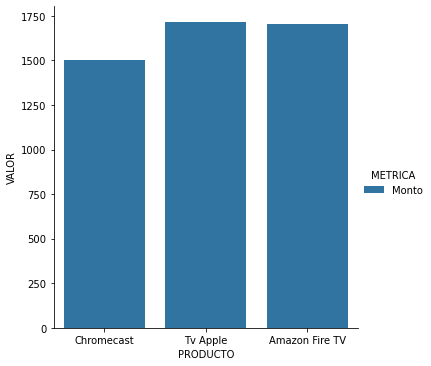

In [28]:
#Graficamos la metrica exportado
sns.factorplot(x='PRODUCTO', y='VALOR', hue='METRICA', data=df_monto, kind='bar')

In [23]:
df_tasa = pd.DataFrame({'PRODUCTO':serie_class,'VALOR': serie_mediana_tasa})
df_tasa ['METRICA'] = 'Tasa'
df_tasa

,PRODUCTO,VALOR,METRICA
0,Chromecast,70.17,Tasa
1,Tv Apple,70.17,Tasa
2,Amazon Fire TV,70.17,Tasa


C:\Users\usuario\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


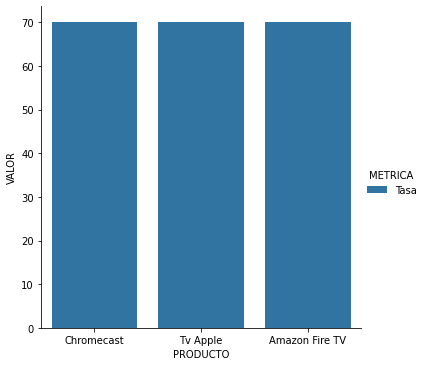

In [25]:
#Graficamos la metrica exportado
sns.factorplot(x='PRODUCTO', y='VALOR', hue='METRICA', data=df_tasa, kind='bar')

In [29]:
df_concatenado = pd.concat ([df_precio,df_monto,df_tasa],axis=0)

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


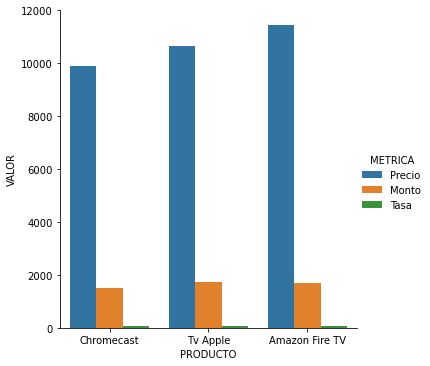

In [30]:
sns.factorplot(x='PRODUCTO', y='VALOR', hue='METRICA', data=df_concatenado, kind='bar')

***-------------------------------------------------------------------------------------------------***

***2. Por cada resultado, realizar el correspondiente GET por Item_Id al recurso público:
https://api.mercadolibre.com/items/{Item_Id}***

In [37]:
df_get = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json").json()['results'])
df_get ['monto'] = df_get.installments.map(lambda x: x['amount'])
df_get ['tasa'] = df_get.installments.map(lambda x: x['rate'])

In [38]:
for indx, i in enumerate(df_get ['id']):
    print(indx)
    if indx==0:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df_get = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df_get ['id'] = json_get['id']
        df_get ['site_id'] = json_get['site_id']
        df_get ['title'] = json_get['title']
        df_get ['subtitle'] = json_get['subtitle']
        df_get ['seller_id'] = json_get['seller_id']
        df_get ['category_id'] = json_get['category_id']
        df_get ['official_store_id'] = json_get['official_store_id']
        df_get ['price'] = json_get['price']
        df_get ['base_price'] = json_get['base_price']
        df_get ['original_price'] = json_get['original_price']
        df_get ['currency_id'] = json_get['currency_id']
        df_get ['initial_quantity'] = json_get['initial_quantity']
        df_get ['available_quantity'] = json_get['available_quantity']
        df_get ['sold_quantity'] = json_get['sold_quantity']
    else:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df_get_aux = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df_get_aux ['id'] = json_get['id']
        df_get_aux ['site_id'] = json_get['site_id']
        df_get_aux ['title'] = json_get['title']
        df_get_aux ['subtitle'] = json_get['subtitle']
        df_get_aux ['seller_id'] = json_get['seller_id']
        df_get_aux ['category_id'] = json_get['category_id']
        df_get_aux ['official_store_id'] = json_get['official_store_id']
        df_get_aux ['price'] = json_get['price']
        df_get_aux ['base_price'] = json_get['base_price']
        df_get_aux ['original_price'] = json_get['original_price']
        df_get_aux ['currency_id'] = json_get['currency_id']
        df_get_aux ['initial_quantity'] = json_get['initial_quantity']
        df_get_aux ['available_quantity'] = json_get['available_quantity']
        df_get_aux ['sold_quantity'] = json_get['sold_quantity']
        
        df_exportacion = pd.concat([df_get,df_get_aux],axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


***-------------------------------------------------------------------------------------------------***

***3. Escribir los resultados en un archivo plano delimitado por comas, desnormalizando
el JSON obtenido en el paso anterior, en tantos campos como sea necesario para
guardar las variables que te interesen modelar***

In [39]:
df_exportacion.to_csv ('exportación.csv',sep=',',index=False)